# 1. Creation and plotting of a normal distribution

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

### a.

In [2]:
normal_distribution = stats.norm(loc=0, scale=1)

### b.

Text(0, 0.5, 'Probability')

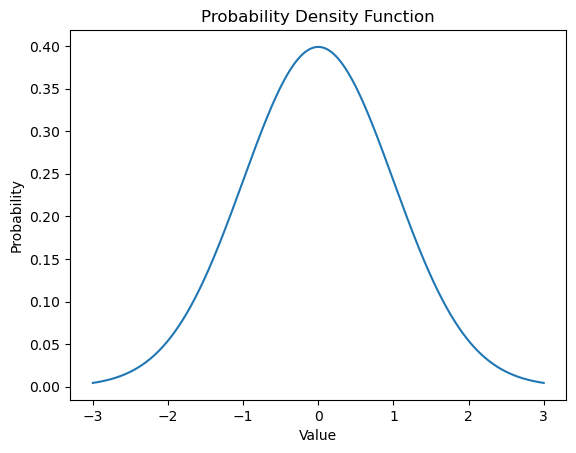

In [3]:
x = np.linspace(-3, 3, 1000)
pdf = normal_distribution.pdf(x)
plt.plot(x, pdf, label='PDF')
plt.title('Probability Density Function')
plt.xlabel('Value')
plt.ylabel('Probability')

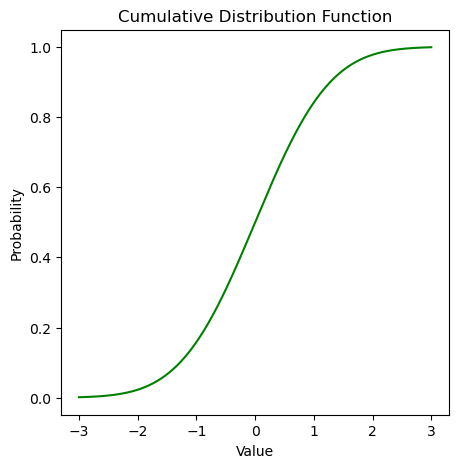

In [4]:
cdf = normal_distribution.cdf(x)
plt.figure(figsize=(5, 5))
plt.plot(x, cdf, color='green')
plt.title('Cumulative Distribution Function')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.show()

### c.

In [5]:
np.random.seed(42)

### d.

In [6]:
sample_size = 1000
uniform_samples = np.random.rand(sample_size)
samples = normal_distribution.ppf(uniform_samples)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


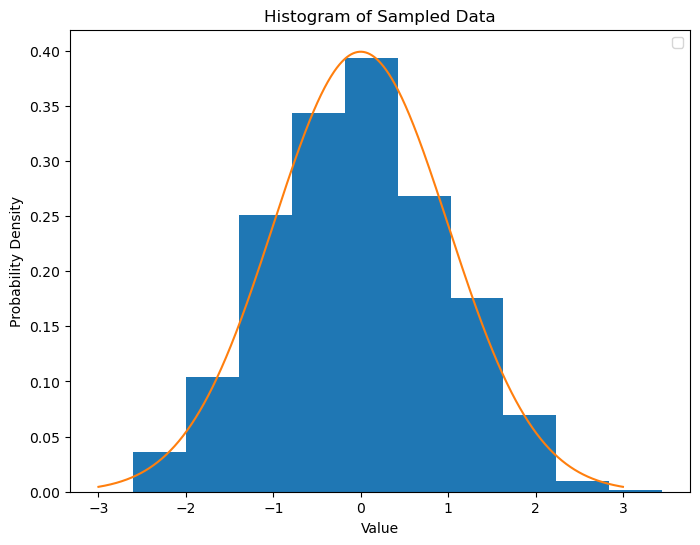

In [7]:
plt.figure(figsize=(8, 6))
plt.hist(samples, density=True)
plt.plot(x, pdf)
plt.title('Histogram of Sampled Data')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

### e.

In [8]:
sample_mean = np.mean(samples)
sample_std = np.std(samples)

print(f"Sample Mean: {sample_mean}")
print(f"Sample Standard Deviation: {sample_std}")

print(f"Original Distribution Mean: {normal_distribution.mean()}")
print(f"Original Distribution Std Dev: {normal_distribution.std()}")

Sample Mean: -0.0316190047468508
Sample Standard Deviation: 0.997223514936935
Original Distribution Mean: 0.0
Original Distribution Std Dev: 1.0


# 2.
### a.

In [9]:
def generate_samples(distribution, n):
    return distribution.rvs(size=n)

### b.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


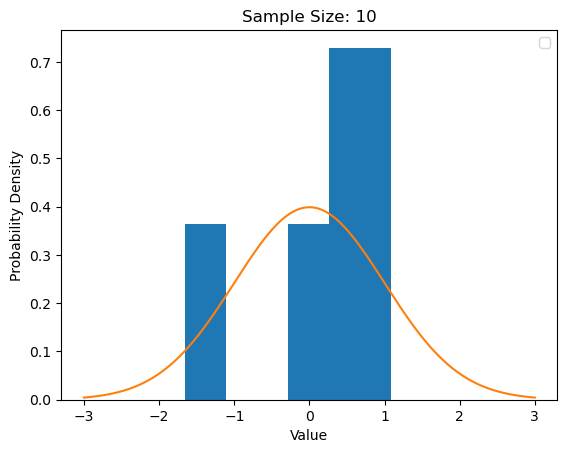

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


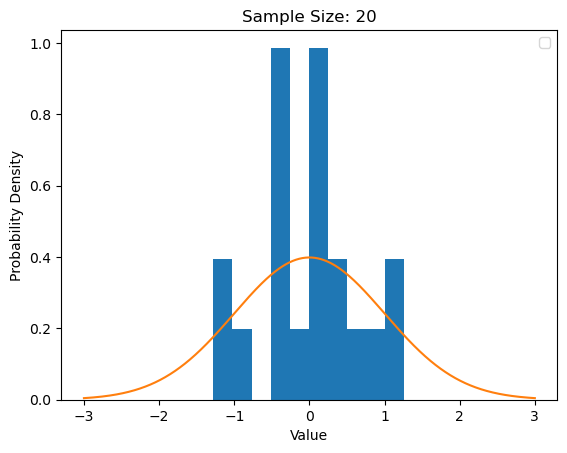

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


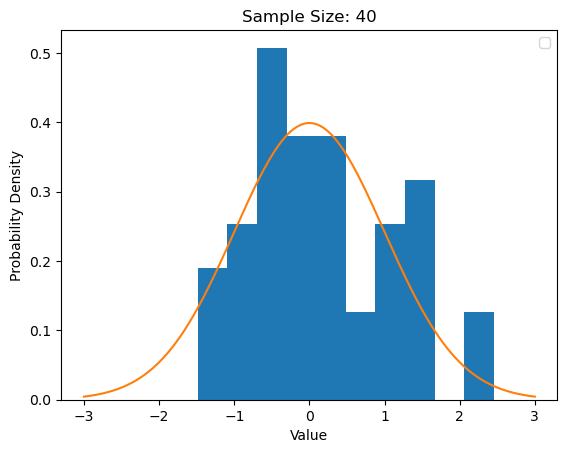

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


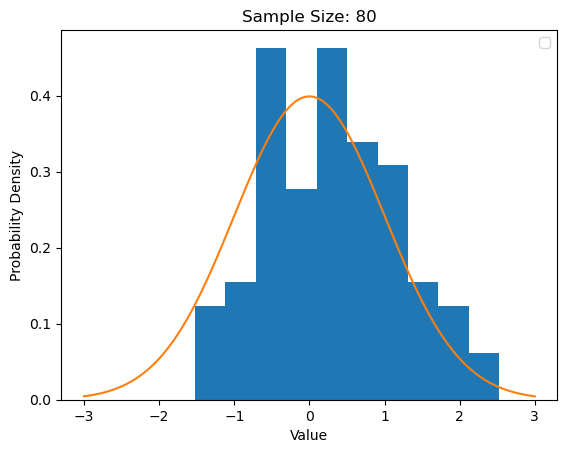

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


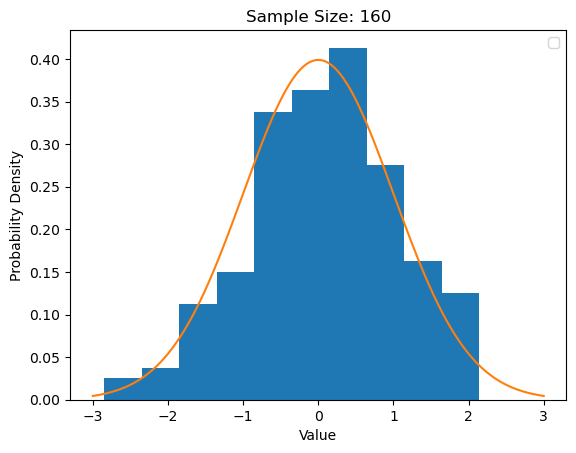

In [10]:
sample_sizes = [10, 20, 40, 80, 160]

for i, n in enumerate(sample_sizes, 1):
    samples = generate_samples(normal_distribution, n)
    plt.hist(samples, density=True)
    x = np.linspace(-3, 3, 1000)
    pdf = normal_distribution.pdf(x)
    plt.plot(x, pdf)
    plt.title(f'Sample Size: {n}')
    plt.xlabel('Value')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.show()

# 3.
### a.

In [11]:
sample_size = 25
group1_samples = generate_samples(normal_distribution, sample_size)
group2_samples = generate_samples(normal_distribution, sample_size)

### b.

In [12]:
effect_size = abs(np.mean(group1_samples) - np.mean(group2_samples))
print(f"Estimated Effect Size: {effect_size}")

Estimated Effect Size: 0.30657878569723573


### c.

In [13]:
def run_iterations(distribution1, distribution2, n, k):
    effect_sizes = []
    samples1_list = []
    samples2_list = []
    
    for j in range(k):
        samples1 = generate_samples(distribution1, n)
        samples2 = generate_samples(distribution2, n)
        effect = abs(np.mean(samples1) - np.mean(samples2))
        
        effect_sizes.append(effect)
        samples1_list.append(samples1)
        samples2_list.append(samples2)
    
    return effect_sizes, samples1_list, samples2_list

### d.

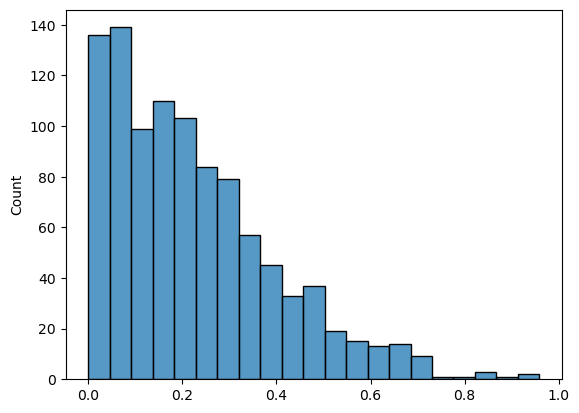

In [14]:
iterations = 1000
effect_sizes, sample1, sample2 = run_iterations(normal_distribution, normal_distribution, sample_size, iterations)

sns.histplot(effect_sizes)

max_effect_size = max(effect_sizes)
max_effect_size_index = effect_sizes.index(max_effect_size)

### e.

<Axes: ylabel='Count'>

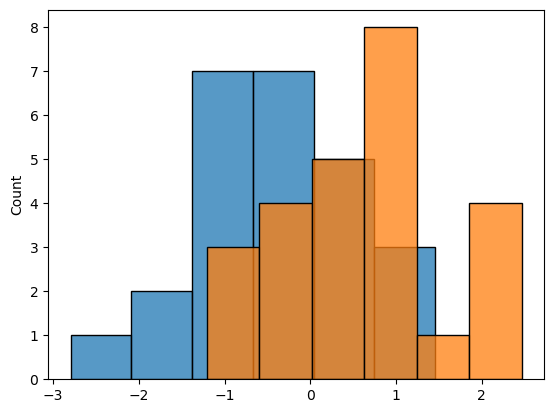

In [15]:
sns.histplot(sample1[max_effect_size_index])
sns.histplot(sample2[max_effect_size_index])

# 4.

In [16]:
norm_alt = stats.norm(1,1)

In [17]:
print("The effect size between these tow populations is: 1")

The effect size between these tow populations is: 1


In [18]:
es, s1, s2 = run_iterations(normal_distribution, norm_alt, 25, 1000)

In [19]:
min_effect_size = min(es)
min_effect_size_index = es.index(min_effect_size)

<Axes: ylabel='Count'>

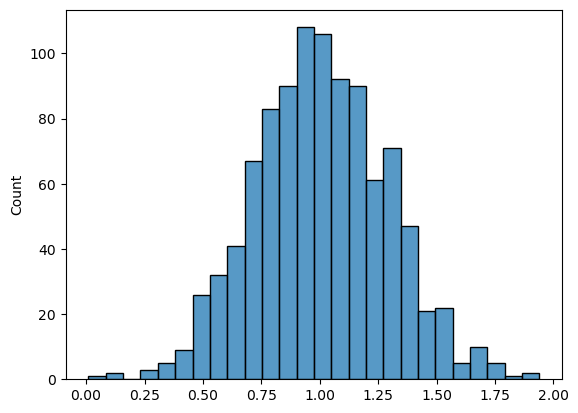

In [20]:
sns.histplot(es, legend=False)

<Axes: ylabel='Count'>

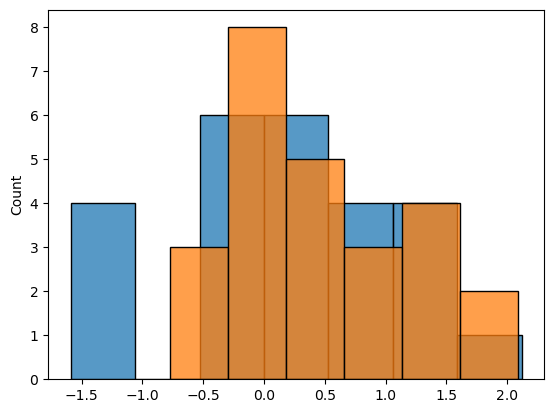

In [21]:
sns.histplot(sample1[min_effect_size_index])
sns.histplot(sample2[min_effect_size_index])